In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./docs/csv/train.csv', sep=";")
print(len(train))
train.head()

7756


,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY","4,7",393,12,6,"3,9","73,4","5,2","13,75",651.0,...,3,"1,267","1,429","2,186",0.0,2.0,1 tbsp,15,.5 oz,0.0
1,"HEARTS OF PALM,CANNED","90,2",28,"2,52","0,62","2,04","4,62","2,4",NaN,58.0,...,NaN,"0,13","0,103","0,202",0.0,146.0,1 cup,33,1 piece,0.0
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...","63,89",196,"24,06","11,09","1,56",0,0,0,13.0,...,0,"2,866","4,878","1,673",130.0,89.0,1 thigh,85,"1 serving, (3 oz)",29.0
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD","54,73",280,"20,43","21,35","3,51",0,0,0,10.0,...,0,"7,67","10,14","2,32",58.0,140.0,1 cup,85,3 oz,27.0
4,"VINEGAR,DISTILLED","94,78",18,0,0,"0,02","0,04",0,"0,04",6.0,...,0,0,0,0,0.0,14.0,1 tbsp,238,1 cup,0.0


In [3]:
test = pd.read_csv('./docs/csv/test.csv', sep=";")
print(len(test))
test.head()

862


,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,SILK KEY LIME SOY YOGURT,"77,59","2,35","1,18","1,24","17,65","0,6","12,35",176.0,"0,64",...,NaN,0,NaN,NaN,0.0,170.0,1 container,NaN,NaN,0.0
1,"FAST FOODS,SALAD,VEG,TOSSED,WO/DRSNG","95,51","1,25","0,07","0,53","3,22",NaN,NaN,13.0,"0,63",...,NaN,"0,01","0,004","0,034",0.0,104.0,.75 cup,207,1.5 cup,0.0
2,"CUTTLEFISH,MXD SP,CKD,MOIST HEAT","61,12","32,48","1,4","3,36","1,64",0,NaN,180.0,"10,84",...,NaN,"0,236","0,162","0,268",224.0,85.0,3 oz,NaN,NaN,0.0
3,"GROUND TURKEY,93% LN,7% FAT,RAW","72,63","18,73","8,34","0,92",0,0,0,21.0,"1,17",...,0,"2,17","2,843","2,537",74.0,28.0,1 oz,453,1 lb,0.0
4,"TURKEY,RTL PARTS,ENHANCED,BREAST,MEAT ONLY,CKD...","69,99","27,94","2,08","1,4",0,0,0,15.0,"0,59",...,0,"0,428","0,67","0,668",74.0,85.0,3 oz,852,1 breast,24.0


In [4]:
df = pd.read_csv('./docs/csv/gramms_train.csv',  usecols = ['Shrt_Desc'])
print(len(df))
df.head()

7756


,Shrt_Desc
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY"
1,"HEARTS OF PALM,CANNED"
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD..."
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD"
4,"VINEGAR,DISTILLED"


### Средняя длина текстов

In [5]:
len_data = df.Shrt_Desc.apply(len)
len_data.describe()

count    7756.000000
mean       37.966478
std        13.540042
min         3.000000
25%        27.000000
50%        38.000000
75%        49.000000
max        60.000000
Name: Shrt_Desc, dtype: float64

### Длины текстов (в символах)

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


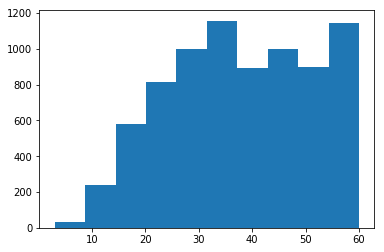

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline


fig, ax = plt.subplots()

length = len_data[len_data < 10000].tolist()

n, bins, patches = ax.hist(length)

fig.show()

## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [7]:
import re
# regex = re.compile("[А-Яа-я]+")
regex = re.compile("[A-Za-z]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

def words_space(text):
    if ',' in text:
        return " ".join(list(text.split(',')))
    else:
        return text


df.Shrt_Desc = df.Shrt_Desc.str.lower()
# print(df.Shrt_Desc[0])
# print(" ".join(list(df.Shrt_Desc[0].split(','))))

df.Shrt_Desc = df.Shrt_Desc.apply(words_only)
df.Shrt_Desc.iloc[0]

'babyfood crl oatmeal w bananas dry'

### Самые частые слова

In [8]:
from nltk import FreqDist

In [9]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['Shrt_Desc'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))
for i in fd.most_common(len(df.Shrt_Desc)):
    print(i)

('fat', 1723)
('ckd', 1535)
('ln', 1336)
('raw', 1210)
('w', 1157)
('beef', 857)
('salt', 559)
('meat', 523)
('s', 505)
('cnd', 468)
('pork', 397)
('rstd', 381)
('frz', 378)
('bld', 353)
('dry', 351)
('wo', 340)
('cereals', 321)
('prep', 316)
('loin', 313)
('bnless', 310)
('drnd', 301)
('rnd', 291)
('soup', 291)
('or', 288)
('all', 283)
('choic', 279)
('steak', 261)
('red', 245)
('rte', 244)
('whl', 242)
('chick', 241)
('lamb', 238)
('frsh', 236)
('skn', 228)
('choc', 228)
('o', 226)
('rst', 225)
('white', 222)
('sel', 219)
('babyfood', 217)
('brsd', 206)
('imp', 204)
('mix', 203)
('chicken', 195)
('kellogg', 195)
('h', 194)
('bf', 194)
('grds', 190)
('top', 189)
('in', 188)
('milk', 187)
('seeds', 187)
('turkey', 185)
('cookies', 182)
('chs', 182)
('from', 170)
('veg', 166)
('brld', 166)
('fast', 164)
('nz', 160)
('sol', 160)
('oil', 159)
('rib', 159)
('campbell', 156)
('shldr', 153)
('only', 152)
('ham', 152)
('fruit', 151)
('fried', 150)
('unprep', 150)
('reg', 144)
('added', 144)
(

('crustaceans', 2)
('ling', 2)
('willow', 2)
('fajita', 2)
('asiago', 2)
('watermelon', 2)
('tangerine', 2)
('hummus', 2)
('gentle', 2)
('pimiento', 2)
('smartpizza', 2)
('agutuk', 2)
('verde', 2)
('mx', 2)
('ringed', 2)
('peppermint', 2)
('sucralose', 2)
('eel', 2)
('monterey', 2)
('grlic', 2)
('blt', 2)
('australn', 2)
('grs', 2)
('mcflurry', 2)
('oreo', 2)
('joy', 2)
('dew', 2)
('sunkist', 2)
('shoyu', 2)
('othr', 2)
('caff', 2)
('pr', 2)
('sugared', 2)
('taquitos', 2)
('cardoon', 2)
('triticale', 2)
('date', 2)
('testes', 2)
('saccharin', 2)
('spiced', 2)
('jo', 2)
('thyme', 2)
('osso', 2)
('buco', 2)
('hush', 2)
('puppies', 2)
('open', 2)
('taffy', 2)
('fondant', 2)
('isomil', 2)
('blenders', 2)
('purch', 2)
('raab', 2)
('sauteed', 2)
('anchovy', 2)
('rosemary', 2)
('rounds', 2)
('peppercorn', 2)
('antioxidants', 2)
('yellowtail', 2)
('an', 2)
('undr', 2)
('abalone', 2)
('spot', 2)
('candied', 2)
('ancho', 2)
('but', 2)
('marath', 2)
('ba', 2)
('eclair', 2)
('soba', 2)
('magnesium

('naturally', 1)
('sparkling', 1)
('snaps', 1)
('tipnuk', 1)
('rsted', 1)
('papad', 1)
('formbar', 1)
('marssnack', 1)
('marathonprotperfbar', 1)
('carmelnutrush', 1)
('extrdd', 1)
('flavoring', 1)
('milkfish', 1)
('besan', 1)
('java', 1)
('jambolan', 1)
('friends', 1)
('kumquats', 1)
('fields', 1)
('zwieback', 1)
('tabasco', 1)
('german', 1)
('styl', 1)
('butmlk', 1)
('refri', 1)
('brittle', 1)
('guacamole', 1)
('lac', 1)
('carambola', 1)
('starfruit', 1)
('kosher', 1)
('refiner', 1)
('sapodilla', 1)
('reddi', 1)
('wip', 1)
('stake', 1)
('mck', 1)
('advanc', 1)
('menthe', 1)
('bistro', 1)
('focaccia', 1)
('flatbread', 1)
('yokan', 1)
('spiral', 1)
('trky', 1)
('pzza', 1)
('lacf', 1)
('cervalat', 1)
('flt', 1)
('fsh', 1)
('salada', 1)
('allspice', 1)
('frosting', 1)
('glaz', 1)
('rcip', 1)
('butr', 1)
('nfsmi', 1)
('recip', 1)
('tomat', 1)


### Закон Ципфа

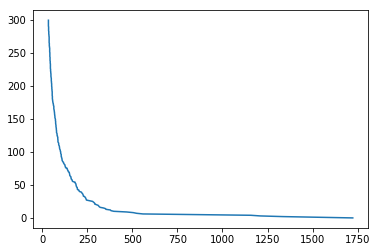

In [10]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### Закон Хипса

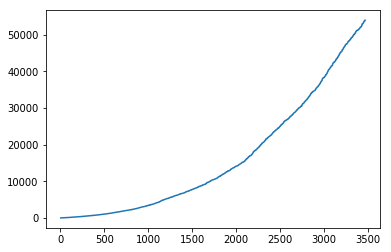

In [11]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()


## Первичная обработка текстов

### Удаление стоп-слов

In [12]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
mystopwords = stopwords.words('english') + ['&', 'w/', '0\"', 'or', '1/8\"', 'only', 'from', 'of', 'not', '/', 'ln'] + ['a','b','c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
 

In [14]:
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [15]:
mystoplemmas = ["german", "tennis", "seasons", "frozen)"]
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""


In [16]:
df.Shrt_Desc = df.Shrt_Desc.apply(remove_stopwords) 
df.Shrt_Desc = df.Shrt_Desc.apply(lemmatize)
df.Shrt_Desc = df.Shrt_Desc.apply(remove_stoplemmas) 

In [17]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['Shrt_Desc'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(len(df.Shrt_Desc)):
    print(i[0])

fat
ckd
raw
beef
salt
meat
cnd
pork
rstd
frz
bld
dry
wo
cereals
prep
loin
bnless
drnd
rnd
soup
choic
steak
red
rte
whl
chick
lamb
frsh
skn
choc
rst
white
sel
babyfood
brsd
imp
mix
chicken
kellogg
bf
grds
top
milk
seeds
turkey
cookies
chs
veg
brld
fast
nz
sol
oil
rib
campbell
shldr
ham
fruit
fried
unprep
reg
added
mature
bone
juc
foods
rice
wheat
candies
stk
corn
eye
crm
pdr
keebler
dried
beans
cond
crackers
free
fryers
cured
broilers
cheese
inf
liquids
lt
butter
chuck
sugar
lo
alaska
veal
ground
ribs
pizza
potatoes
native
pln
sau
blade
pk
leg
var
bev
vit
formula
egg
vanilla
sausage
products
bread
recipe
dom
salad
drsng
sirloin
heat
quaker
na
enr
type
bns
style
swt
bar
bkd
inst
grain
pan
syrup
str
meats
crust
tomato
grilled
bnls
flavor
rts
arm
mxd
flr
chops
sndwch
fudge
cal
crl
soy
kashi
potato
ice
oatmeal
snacks
original
lip
breast
chips
grn
dk
alcoholic
drk
rtl
tenderloin
cntr
fish
mills
enhanced
yel
general
half
mcdonald
french
chunky
honey
jr
end
comp
htd
game
pie
yogurt
volume
unen

shoyu
othr
caff
pr
sugared
taquitos
cardoon
triticale
date
testes
saccharin
spiced
jo
thyme
osso
buco
hush
puppies
open
taffy
fondant
isomil
blenders
purch
raab
sauteed
anchovy
rosemary
rounds
peppercorn
antioxidants
yellowtail
undr
abalone
spot
candied
ancho
marath
ba
eclair
soba
magnesium
chloride
cereal
lactofree
fern
unfortified
asian
chives
brains
nutmeg
sz
wocas
oregon
pond
lily
klamath
mussel
masala
antelope
mcgriddles
angelfood
catsup
shakes
pebbles
ab
rt
oh
spit
semisweet
jellied
undbl
ct
eggnog
isomi
whelk
roughy
martha
dehydrated
delight
beaver
shdr
gewurztraminer
russet
chayote
berries
chmp
shnk
zevia
cultivated
emi
tsunomata
sze
srln
sharp
sweetener
herbal
sauvignon
rockfish
tod
tuber
aa
fireweed
chitterlings
ultra
glutinous
chewing
munch
pourable
prairie
spoon
grouper
fudgesicle
koyadofu
wrappers
fudg
wafflers
strudel
duckling
york
chseburger
whtnr
goodness
liverwurst
dogs
croaker
sage
carbohydrate
chopped
backs
necks
ori
shad
mateys
whiz
roe
fil
break
rost
walleye
cervel

fsh
salada
allspice
frosting
glaz
rcip
butr
nfsmi
recip
tomat


## Извлечение ключевых слов

## Извлечение ключевых словосочетаний

In [18]:
from nltk.corpus import wordnet 
syns = wordnet.synsets("chick")
print("Defination of the said word:")
print(syns[0].definition())
print("\nExamples of the word in use::")
print(syns[0].examples())

Defination of the said word:
young bird especially of domestic fowl

Examples of the word in use::
[]


## Вычисление сходства и Gensim

Представление данных в Gensim словарем и корпусом:

In [19]:
from gensim.corpora import *
# df.sort_values(['class'], inplace = True)
texts = [df.Shrt_Desc.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [20]:
# %%time
from gensim.models import  *
tfidf = TfidfModel(corpus)
print(tfidf[corpus])
corpus_tfidf = tfidf[corpus]

In [21]:
from gensim import similarities

index = similarities.MatrixSimilarity(tfidf[corpus])
sims = index[corpus_tfidf]

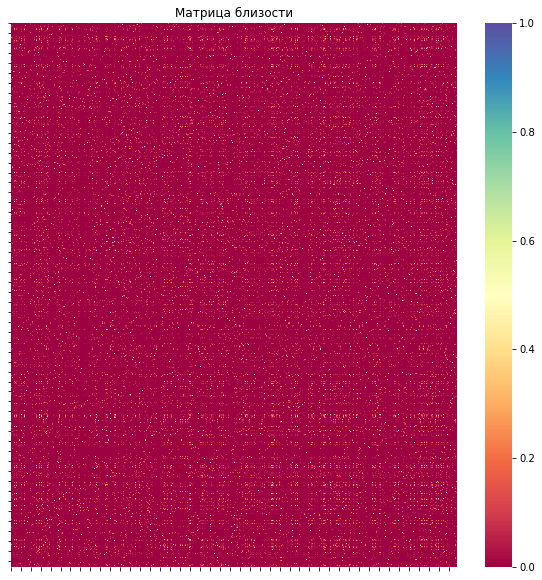

In [22]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))


sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

plt.title("Матрица близости")
plt.show()

In [23]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.Shrt_Desc)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


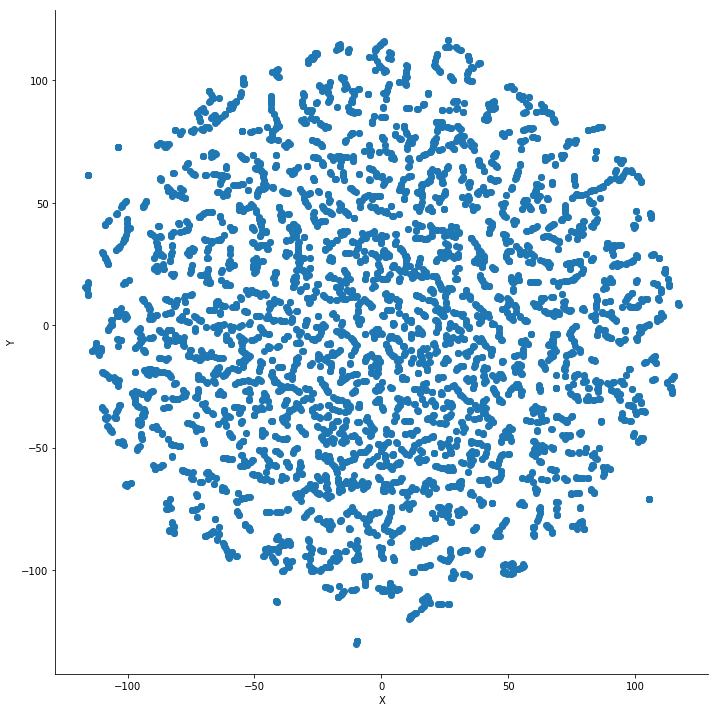

In [24]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1]})
sns.FacetGrid(vis_df, size=10).map(plt.scatter, "X", "Y").add_legend()